# Imports and Setup 

In [7]:
# %% [markdown]
# # Imports and Setup 

# %%
import numpy as np  # Linear algebra
import pandas as pd  # Data processing, CSV file I/O
import glob
import keras
import cv2
from keras.layers import Input  # Add this import statement at the top of your code
from sklearn.utils import shuffle
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, LearningRateScheduler
import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Loading Data

In [8]:
gen = [glob.glob('../data/forgery-detection/Dataset/dataset1/real/*.*'),
       glob.glob('../data/forgery-detection/Dataset/dataset2/real/*.*'),
       glob.glob('../data/forgery-detection/Dataset/dataset3/real/*.*'),
       glob.glob('../data/forgery-detection/Dataset/dataset4/real1/*.*')]


forg = [glob.glob('../data/forgery-detection/Dataset/dataset1/forge/*.*'),
        glob.glob('../data/forgery-detection/Dataset/dataset2/forge/*.*'),
        glob.glob('../data/forgery-detection/Dataset/dataset3/forge/*.*'),
        glob.glob('../data/forgery-detection/Dataset/dataset4/forge/*.*')]


# Preparing Data for Training

In [9]:
train_data = []
train_labels = []
test_data = []
test_labels = []

# Load and process genuine data (real signatures)
for data in range(len(gen)):
    for i in gen[data]:
        print(f"Processing genuine image: {i}")  # Debug: Check which image is being processed
        image = cv2.imread(i)
        
        if image is None:
            print(f"Error loading image {i}")  # Debug: Check if image is loaded correctly
            continue
            
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (224, 224))
        
        if data == 3:
            test_data.append(image)
            test_labels.append(0)
        else:
            train_data.append(image)
            train_labels.append(0)  # Genuine = 0

# Load and process forged data
for data in range(len(forg)):
    for j in forg[data]:
        print(f"Processing forged image: {j}")  # Debug: Check which image is being processed
        image = cv2.imread(j)
        
        if image is None:
            print(f"Error loading image {j}")  # Debug: Check if image is loaded correctly
            continue
            
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (224, 224))
        
        if data == 3:
            test_data.append(image)
            test_labels.append(1)
        else:
            train_data.append(image)
            train_labels.append(1)  # Forged = 1

# Debug: Print out the number of images loaded
print(f"Number of training images: {len(train_data)}")
print(f"Number of training labels: {len(train_labels)}")
print(f"Number of test images: {len(test_data)}")
print(f"Number of test labels: {len(test_labels)}")


Processing genuine image: ../data/forgery-detection/Dataset/dataset1/real/01103011.png
Processing genuine image: ../data/forgery-detection/Dataset/dataset1/real/00503005.png
Processing genuine image: ../data/forgery-detection/Dataset/dataset1/real/00302003.png
Processing genuine image: ../data/forgery-detection/Dataset/dataset1/real/00403004.png
Processing genuine image: ../data/forgery-detection/Dataset/dataset1/real/01200012.png
Processing genuine image: ../data/forgery-detection/Dataset/dataset1/real/00504005.png
Processing genuine image: ../data/forgery-detection/Dataset/dataset1/real/00801008.png
Processing genuine image: ../data/forgery-detection/Dataset/dataset1/real/00604006.png
Processing genuine image: ../data/forgery-detection/Dataset/dataset1/real/01000010.png
Processing genuine image: ../data/forgery-detection/Dataset/dataset1/real/00202002.png
Processing genuine image: ../data/forgery-detection/Dataset/dataset1/real/00401004.png
Processing genuine image: ../data/forgery-d

libpng warning: iCCP: known incorrect sRGB profile


Processing genuine image: ../data/forgery-detection/Dataset/dataset3/real/02104021.png
Processing genuine image: ../data/forgery-detection/Dataset/dataset3/real/02204022.png
Processing genuine image: ../data/forgery-detection/Dataset/dataset3/real/02805028.png
Processing genuine image: ../data/forgery-detection/Dataset/dataset3/real/01301013.png
Processing genuine image: ../data/forgery-detection/Dataset/dataset3/real/02505025.png
Processing genuine image: ../data/forgery-detection/Dataset/dataset3/real/01802018.png
Processing genuine image: ../data/forgery-detection/Dataset/dataset3/real/02402024.png
Processing genuine image: ../data/forgery-detection/Dataset/dataset3/real/02705027.png
Processing genuine image: ../data/forgery-detection/Dataset/dataset3/real/02102021.png
Processing genuine image: ../data/forgery-detection/Dataset/dataset3/real/01202012.png
Processing genuine image: ../data/forgery-detection/Dataset/dataset3/real/02005020.png
Processing genuine image: ../data/forgery-d

libpng warning: iCCP: known incorrect sRGB profile


Processing genuine image: ../data/forgery-detection/Dataset/dataset3/real/01304013.png
Processing genuine image: ../data/forgery-detection/Dataset/dataset3/real/00101001.png
Processing genuine image: ../data/forgery-detection/Dataset/dataset3/real/03002030.png
Processing genuine image: ../data/forgery-detection/Dataset/dataset3/real/00102001.png
Processing genuine image: ../data/forgery-detection/Dataset/dataset3/real/01004010.png
Processing genuine image: ../data/forgery-detection/Dataset/dataset3/real/02401024.png
Processing genuine image: ../data/forgery-detection/Dataset/dataset3/real/01702017.png
Processing genuine image: ../data/forgery-detection/Dataset/dataset3/real/02502025.png
Processing genuine image: ../data/forgery-detection/Dataset/dataset3/real/02103021.png
Processing genuine image: ../data/forgery-detection/Dataset/dataset3/real/00805008.png
Processing genuine image: ../data/forgery-detection/Dataset/dataset3/real/01403014.png
Processing genuine image: ../data/forgery-d

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


Processing genuine image: ../data/forgery-detection/Dataset/dataset3/real/01302013.png
Processing genuine image: ../data/forgery-detection/Dataset/dataset3/real/01705017.png
Processing genuine image: ../data/forgery-detection/Dataset/dataset3/real/02504025.png
Processing genuine image: ../data/forgery-detection/Dataset/dataset3/real/00703007.png
Processing genuine image: ../data/forgery-detection/Dataset/dataset3/real/01001010.png
Processing genuine image: ../data/forgery-detection/Dataset/dataset3/real/01701017.png
Processing genuine image: ../data/forgery-detection/Dataset/dataset3/real/00301003.png
Processing genuine image: ../data/forgery-detection/Dataset/dataset3/real/01401014.png
Processing genuine image: ../data/forgery-detection/Dataset/dataset3/real/01603016.png
Processing genuine image: ../data/forgery-detection/Dataset/dataset3/real/02603026.png
Processing genuine image: ../data/forgery-detection/Dataset/dataset3/real/00502005.png
Processing genuine image: ../data/forgery-d

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


Processing genuine image: ../data/forgery-detection/Dataset/dataset3/real/03004030.png
Processing genuine image: ../data/forgery-detection/Dataset/dataset3/real/01101011.png
Processing genuine image: ../data/forgery-detection/Dataset/dataset3/real/02601026.png
Processing genuine image: ../data/forgery-detection/Dataset/dataset3/real/01505015.png
Processing genuine image: ../data/forgery-detection/Dataset/dataset3/real/00903009.png
Processing genuine image: ../data/forgery-detection/Dataset/dataset3/real/00601006.png
Processing genuine image: ../data/forgery-detection/Dataset/dataset3/real/00103001.png
Processing genuine image: ../data/forgery-detection/Dataset/dataset3/real/01602016.png
Processing genuine image: ../data/forgery-detection/Dataset/dataset3/real/00904009.png
Processing genuine image: ../data/forgery-detection/Dataset/dataset3/real/00204002.png
Processing genuine image: ../data/forgery-detection/Dataset/dataset3/real/02501025.png
Processing genuine image: ../data/forgery-d

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


Processing genuine image: ../data/forgery-detection/Dataset/dataset3/real/01904019.png
Processing genuine image: ../data/forgery-detection/Dataset/dataset3/real/01003010.png
Processing genuine image: ../data/forgery-detection/Dataset/dataset3/real/01804018.png
Processing genuine image: ../data/forgery-detection/Dataset/dataset3/real/01405014.png
Processing genuine image: ../data/forgery-detection/Dataset/dataset3/real/01805018.png
Processing genuine image: ../data/forgery-detection/Dataset/dataset4/real1/07103071.png
Processing genuine image: ../data/forgery-detection/Dataset/dataset4/real1/01601016.png
Processing genuine image: ../data/forgery-detection/Dataset/dataset4/real1/02404024.png
Processing genuine image: ../data/forgery-detection/Dataset/dataset4/real1/01604016.png
Processing genuine image: ../data/forgery-detection/Dataset/dataset4/real1/04602046.png
Processing genuine image: ../data/forgery-detection/Dataset/dataset4/real1/07705077.png
Processing genuine image: ../data/for

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


Processing forged image: ../data/forgery-detection/Dataset/dataset3/forge/00403013.png
Processing forged image: ../data/forgery-detection/Dataset/dataset3/forge/00501015.png
Processing forged image: ../data/forgery-detection/Dataset/dataset3/forge/01302017.png
Processing forged image: ../data/forgery-detection/Dataset/dataset3/forge/00103019.png
Processing forged image: ../data/forgery-detection/Dataset/dataset3/forge/02301008.png
Processing forged image: ../data/forgery-detection/Dataset/dataset3/forge/01205021.png
Processing forged image: ../data/forgery-detection/Dataset/dataset3/forge/01704020.png
Processing forged image: ../data/forgery-detection/Dataset/dataset3/forge/00302005.png
Processing forged image: ../data/forgery-detection/Dataset/dataset3/forge/00104025.png
Processing forged image: ../data/forgery-detection/Dataset/dataset3/forge/00101027.png
Processing forged image: ../data/forgery-detection/Dataset/dataset3/forge/00103014.png
Processing forged image: ../data/forgery-de

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


Processing forged image: ../data/forgery-detection/Dataset/dataset3/forge/00303009.png
Processing forged image: ../data/forgery-detection/Dataset/dataset3/forge/00405003.png
Processing forged image: ../data/forgery-detection/Dataset/dataset3/forge/00405024.png
Processing forged image: ../data/forgery-detection/Dataset/dataset3/forge/00404013.png
Processing forged image: ../data/forgery-detection/Dataset/dataset3/forge/00402003.png
Processing forged image: ../data/forgery-detection/Dataset/dataset3/forge/00505015.png
Processing forged image: ../data/forgery-detection/Dataset/dataset3/forge/02304008.png
Processing forged image: ../data/forgery-detection/Dataset/dataset3/forge/00305009.png
Processing forged image: ../data/forgery-detection/Dataset/dataset3/forge/01203021.png
Processing forged image: ../data/forgery-detection/Dataset/dataset3/forge/00703023.png
Processing forged image: ../data/forgery-detection/Dataset/dataset3/forge/01105012.png
Processing forged image: ../data/forgery-de

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


Processing forged image: ../data/forgery-detection/Dataset/dataset3/forge/00305001.png
Processing forged image: ../data/forgery-detection/Dataset/dataset3/forge/00705023.png
Processing forged image: ../data/forgery-detection/Dataset/dataset3/forge/01705020.png
Processing forged image: ../data/forgery-detection/Dataset/dataset3/forge/01204021.png
Processing forged image: ../data/forgery-detection/Dataset/dataset3/forge/00302002.png
Processing forged image: ../data/forgery-detection/Dataset/dataset3/forge/00402024.png
Processing forged image: ../data/forgery-detection/Dataset/dataset3/forge/00401013.png
Processing forged image: ../data/forgery-detection/Dataset/dataset3/forge/01702020.png
Processing forged image: ../data/forgery-detection/Dataset/dataset3/forge/08801004.png
Processing forged image: ../data/forgery-detection/Dataset/dataset3/forge/00102029.png
Processing forged image: ../data/forgery-detection/Dataset/dataset3/forge/00105030.png
Processing forged image: ../data/forgery-de

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


Processing forged image: ../data/forgery-detection/Dataset/dataset3/forge/03302006.png
Processing forged image: ../data/forgery-detection/Dataset/dataset3/forge/01701020.png
Processing forged image: ../data/forgery-detection/Dataset/dataset3/forge/00101029.png
Processing forged image: ../data/forgery-detection/Dataset/dataset3/forge/00403007.png
Processing forged image: ../data/forgery-detection/Dataset/dataset3/forge/01101012.png
Processing forged image: ../data/forgery-detection/Dataset/dataset3/forge/00304001.png
Processing forged image: ../data/forgery-detection/Dataset/dataset3/forge/00404003.png
Processing forged image: ../data/forgery-detection/Dataset/dataset3/forge/01303017.png
Processing forged image: ../data/forgery-detection/Dataset/dataset3/forge/00401003.png
Processing forged image: ../data/forgery-detection/Dataset/dataset4/forge/01605033.png
Processing forged image: ../data/forgery-detection/Dataset/dataset4/forge/01604089.png
Processing forged image: ../data/forgery-de

# Normalizing the Images

In [10]:
# Normalize pixel values to [0, 1]
train_data = np.array(train_data) / 255.0
train_labels = np.array(train_labels)
test_data = np.array(test_data) / 255.0
test_labels = np.array(test_labels)

# Shuffle the dataset
train_data, train_labels = shuffle(train_data, train_labels)
test_data, test_labels = shuffle(test_data, test_labels)

print(f"Number of training samples: {len(train_data)}")
print(f"Number of training labels: {len(train_labels)}")



Number of training samples: 540
Number of training labels: 540


# Defining the Model

In [11]:


network = models.Sequential()

# Add the input layer (this replaces input_shape in Conv2D)
network.add(Input(shape=(224, 224, 3)))

# Add the first convolutional layer
network.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Add the first max-pooling layer
network.add(layers.MaxPooling2D((3, 3)))

# Add the second convolutional layer
network.add(layers.Conv2D(32, (3, 3), activation='relu'))

# Add the second max-pooling layer
network.add(layers.MaxPooling2D((2, 2)))

# Flatten the output of the convolutional layers
network.add(layers.Flatten())

# Add a fully connected dense layer
network.add(layers.Dense(128, activation='relu'))

# Add a dropout layer
network.add(layers.Dropout(rate=0.3))

# Add the final output layer
network.add(layers.Dense(2, activation='softmax'))

# Compile the model
network.compile(optimizer=Adam(learning_rate=0.001), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Display the model summary
network.summary()


2024-12-29 19:14:25.303773: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 41472)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     5,308,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,329,058 (20.33 MB)

 Trainable params: 5,329,058 (20.33 MB)

 Non-trainable params: 0 (0.00 B)

# Define Callbacks

In [12]:
# %% Define callbacks for early stopping and model checkpoint
checkpoint_callback = ModelCheckpoint('model_best.keras', save_best_only=True, monitor='val_loss', mode='min', verbose=1)
earlyStopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=1)


# Model Training

In [13]:
# %% Train the model
EPOCHS = 5
BS = 1
progress = network.fit(train_data, train_labels, batch_size=BS, epochs=EPOCHS, callbacks=[checkpoint_callback, earlyStopping], validation_split=0.05)


Epoch 1/5


2024-12-29 19:14:25.631242: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 308883456 exceeds 10% of free system memory.


513/513 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.4540 - loss: 2.0413
Epoch 1: val_loss improved from inf to 0.68863, saving model to model_best.keras
513/513 ━━━━━━━━━━━━━━━━━━━━ 36s 68ms/step - accuracy: 0.4540 - loss: 2.0394 - val_accuracy: 0.6667 - val_loss: 0.6886
Epoch 2/5
513/513 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.5248 - loss: 0.7034
Epoch 2: val_loss did not improve from 0.68863
513/513 ━━━━━━━━━━━━━━━━━━━━ 35s 67ms/step - accuracy: 0.5248 - loss: 0.7034 - val_accuracy: 0.3704 - val_loss: 0.6929
Epoch 3/5
513/513 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.5081 - loss: 0.7370
Epoch 3: val_loss did not improve from 0.68863
513/513 ━━━━━━━━━━━━━━━━━━━━ 35s 68ms/step - accuracy: 0.5081 - loss: 0.7370 - val_accuracy: 0.6667 - val_loss: 0.6906
Epoch 4/5
513/513 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.5400 - loss: 0.6932
Epoch 4: val_loss did not improve from 0.68863
513/513 ━━━━━━━━━━━━━━━━━━━━ 34s 67ms/step - accuracy: 0.5399 - loss: 0.6932 - val_accu

# Plot Training , Validation Accuracy Loss

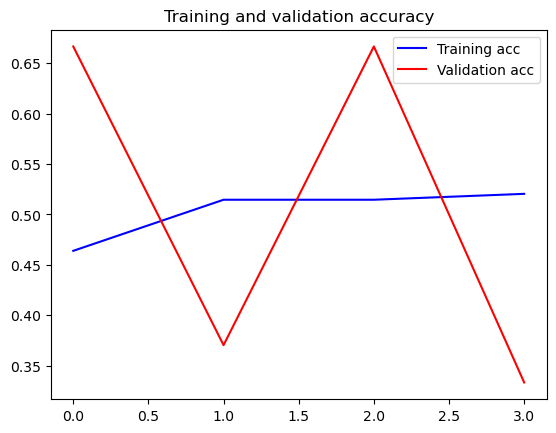

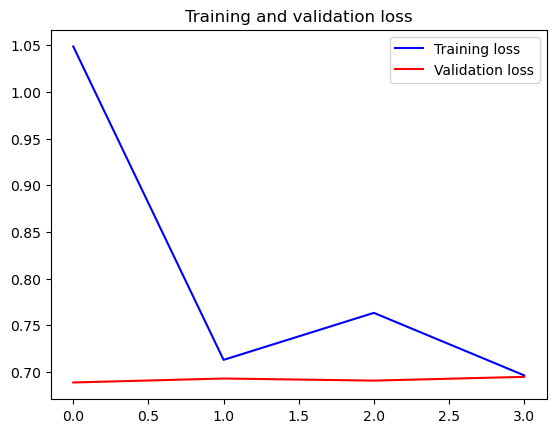

In [14]:
# %% [markdown]
# # Plot Training , Validation Accuracy Loss

# %%
# Plot training and validation accuracy and loss
acc = progress.history['accuracy']
val_acc = progress.history['val_accuracy']
loss = progress.history['loss']
val_loss = progress.history['val_loss']

epochs = range(len(acc))

# Plot accuracy
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

# Plot loss
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


# Evaluate The Model

In [15]:
# %% [markdown]
# # Evaluate The Model

# %%
# Evaluate the model on the test data
pred = network.predict(test_data)

# Convert predictions to labels
pred_labels = pred.argmax(axis=1)

# Evaluate accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(pred_labels, test_labels)
print(f'Accuracy: {accuracy * 100:.2f}%')


1/6 ━━━━━━━━━━━━━━━━━━━━ 1s 256ms/step

2024-12-29 19:16:45.902307: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 403734528 exceeds 10% of free system memory.
2024-12-29 19:16:46.083509: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 403734528 exceeds 10% of free system memory.


3/6 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step

2024-12-29 19:16:46.258439: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 403734528 exceeds 10% of free system memory.
2024-12-29 19:16:46.430951: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 403734528 exceeds 10% of free system memory.


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 170ms/step
Accuracy: 65.56%
